In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('stock.csv', parse_dates=['Date'])
df

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,2017-09-11,0.005984,0.000623,-0.002043,-0.003310
1980,2017-10-11,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df_1=df.drop(['Oil Investments','Comp Stock','Other sharesInvestments'], axis=1)
df_1

,Date,Gold Investments
0,2009-12-31,0.000150
1,2010-04-01,0.001097
2,2010-05-01,0.001560
3,2010-06-01,0.006009
4,2010-07-01,0.000221
...,...,...
1979,2017-09-11,0.000623
1980,2017-10-11,-0.000389
1981,2017-11-13,-0.004944
1982,2017-11-14,-0.002621


In [5]:
df_1.isnull().sum()

Date                0
Gold Investments    0
dtype: int64

In [6]:
df_1.dtypes

Date                datetime64[ns]
Gold Investments           float64
dtype: object

In [7]:
df_1.set_index('Date', inplace=True)

In [8]:
df_1

,Gold Investments
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221
...,...
2017-09-11,0.000623
2017-10-11,-0.000389
2017-11-13,-0.004944


In [9]:
type(df_1)

pandas.core.frame.DataFrame

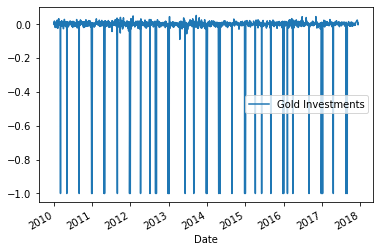

In [10]:
df_1.plot()

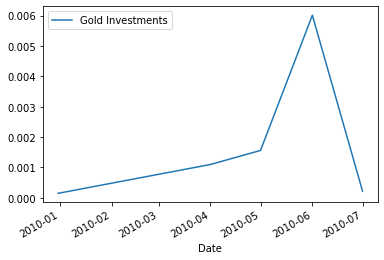

In [11]:
df_2=df_1.iloc[0:5]
df_2.plot()

In [12]:
rolmean=df_1.rolling(window=12).mean()

rolstd=df_1.rolling(window=12).std()

print(rolmean, rolstd)

            Gold Investments
Date                        
2009-12-31               NaN
2010-04-01               NaN
2010-05-01               NaN
2010-06-01               NaN
2010-07-01               NaN
...                      ...
2017-09-11          0.000553
2017-10-11          0.000616
2017-11-13          0.000285
2017-11-14          0.000545
2017-11-15          0.000676

[1984 rows x 1 columns]             Gold Investments
Date                        
2009-12-31               NaN
2010-04-01               NaN
2010-05-01               NaN
2010-06-01               NaN
2010-07-01               NaN
...                      ...
2017-09-11          0.004662
2017-10-11          0.004642
2017-11-13          0.004900
2017-11-14          0.004627
2017-11-15          0.004767

[1984 rows x 1 columns]


In [13]:
df_3=df_1.iloc[0:50]
df_4=rolmean.iloc[0:50]
df_5=rolstd.iloc[0:50]

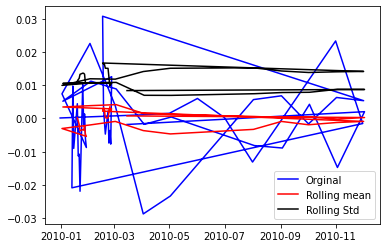

In [14]:
orgin = plt.plot(df_3, color='blue', label ='Orginal')
mean = plt.plot(df_4, color='red', label= 'Rolling mean')
std=plt.plot(df_5,color='black', label='Rolling Std')
plt.legend()
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

print('Result for Dicky Fuller Test')
df_test = adfuller(df_1['Gold Investments'], autolag='AIC')

print(f'ADF Test Statistic : {df_test[0]}')
print(f' pvalue : {df_test[1]}')
print(f' n lags : {df_test[2]}')

for key, value in df_test[4].items():
    print('Critical value')
    
    print(f' {key}, {value},\n')

Result for Dicky Fuller Test
ADF Test Statistic : -15.906853851668977
 pvalue : 8.208405770370657e-29
 n lags : 7
Critical value
 1%, -3.4336636717018405,

Critical value
 5%, -2.8630037919874423,

Critical value
 10%, -2.567549261922421,



After visualizing data of oil investments from rolling test and now by getting the values from dicky fuller test
we can see that the graph and the p values is less than 0.05 and there is no trend in the graph. 
And even the critcal value should be more than ADF test statistics which we can see here it is.
So we can conclude that the data is stationary

In [16]:

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [17]:
adfuller_test(df_1['Gold Investments'])

ADF Test Statistic : -15.906853851668977
p-value : 8.208405770370657e-29
#Lags Used : 7
Number of Observations Used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


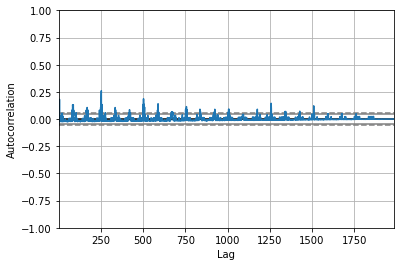

In [19]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_1['Gold Investments'])
plt.show()

In [20]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

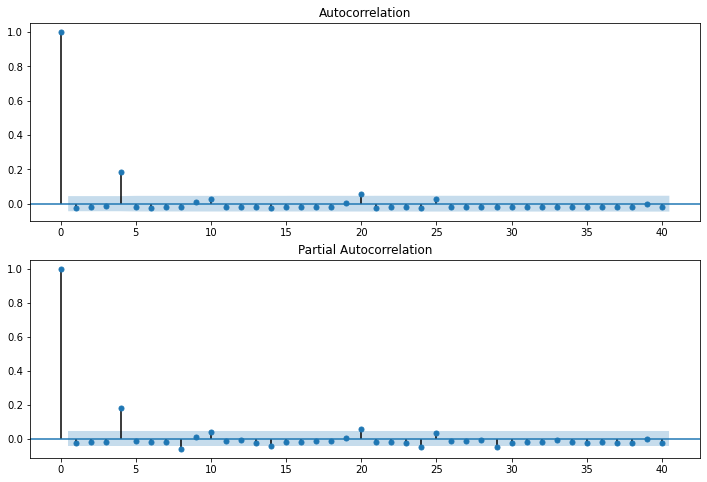

In [21]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)

fig=sm.graphics.tsa.plot_acf(df_1['Gold Investments'].iloc[:], lags=40, ax=ax1)

ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df_1['Gold Investments'].iloc[:], lags=40, ax=ax2)



In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [37]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [39]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    model=ARIMA(df_1['Gold Investments'],order=(param)) 
    model_fit=model.fit()
    print(param,model_fit.aic)

(0, 0, 0) -2140.9227929039644
(0, 0, 1) -2140.0279340904863
(0, 0, 2) -2138.633387865347
(0, 0, 3) -2136.7865280319156
(0, 0, 4) -2205.4166549052516
(0, 1, 0) -719.0412884429043
(0, 1, 1) -2129.296971753917
(0, 1, 2) -2128.3572876933076
(0, 1, 3) -2126.9321389020324
(0, 1, 4) -2123.6121541211287
(0, 2, 0) 1461.8432022554225
(0, 2, 1) -708.08463478679
(0, 2, 2) -2088.4861033358948
(0, 2, 3) -2067.149460300143
(0, 2, 4) -2085.151463089691


ValueError: d > 2 is not supported

In [33]:
model=ARIMA(df_1['Gold Investments'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\ssdev\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ssdev\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\ssdev\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ssdev\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

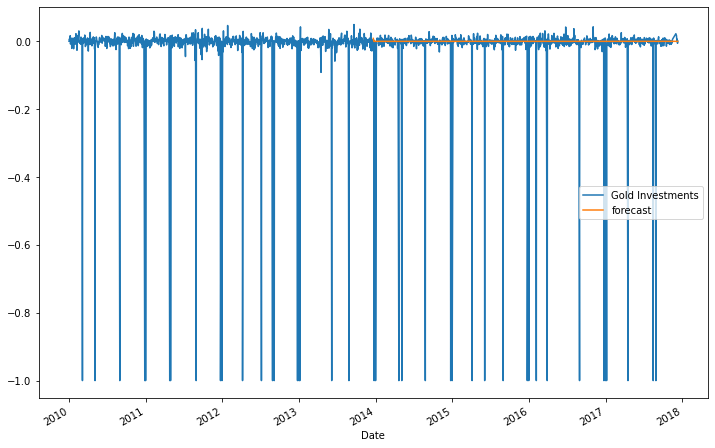

In [34]:
df_1['forecast']=model_fit.predict(start=1000,end=1983,dynamic=True)
df_1[['Gold Investments','forecast']].plot(figsize=(12,8))

In [44]:
model=sm.tsa.statespace.SARIMAX(df_1['Gold Investments'],order=(2, 0, 2),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

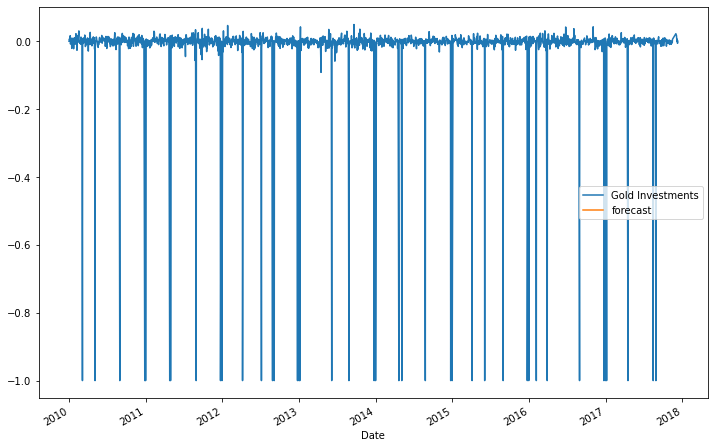

In [45]:
df_1['forecast']=results.predict(start=1000,end=1984,dynamic=True)
df_1[['Gold Investments','forecast']].plot(figsize=(12,8))